# Einführung in die Programmierung für Studierende der Physik
# (Introduction to Programming for Physicists)

### Vorlesung gehalten an der J.W.Goethe-Universität in Frankfurt am Main 
#### (Sommersemester 2025)

### von Dr.phil.nat. Dr.rer.pol. Matthias Hanauske

### Frankfurt am Main 27.01.2025

## Numerisches Lösen von Differentialgleichungen 
### Systeme von gekoppelten Differentialgleichungen und Differentialgleichungen zweiter Ordnung

Im Jupyter Notebook <A href="http://itp.uni-frankfurt.de/~hanauske/VPROG/2025/DGL_1.html" target="_blank">DGL_1.ipynb</A> haben wir einige in Python implementierte Lösungsmethoden für Differentialgleichungen erster Ordnung kennengelernt. In diesem Notebook werden wir uns zunächst mit Systemen von gekoppelten Differentialgleichungen erster Ordnung befassen und dann das numerische Lösen von Differentialgleichungen zweiter Ordnung vorstellen.

### Systeme von gekoppelten Differentialgleichungen 

Wir betrachten zunächst das numerische Lösen eines Systems von $m$-gekoppelten Differentialgleichungen (DGLs) erster Ordnung der Form 

$$
\begin{eqnarray}
\dot{y_1}(t) &=& \frac{d y_1}{dt} = f_1(t,y_1,y_2,...,y_m) \\
\dot{y_2}(t) &=& \frac{d y_2}{dt} = f_2(t,y_1,y_2,...,y_m) \\
\dot{y_3}(t) &=& ... \,\, = \\
... &=& ... \\
\dot{y_m}(t) &=& \frac{d y_m}{dt} = f_m(t,y_1,y_2,...,y_m) \quad ,
\end{eqnarray}
$$

wobei die zeitliche Entwicklung der Vektorfunktion $\vec{y}(t) = \left( y_1(t), y_2(t), ..., y_m(t) \right)$ in den Grenzen $a \leq t \leq b$ gesucht wird. Die $m$-Funktionen $f_i(t,y_1,y_2,...,y_m)\, , \,\, i \in [1,2,...,m]$ bestimmen das System der DGLs und somit das Verhalten der gesuchten Funktion $\vec{y}(t)$. Es wird hierbei vorausgesetzt, dass die Funktionen $f_i(t,y_1,y_2,...,y_m)$ auf einer Teilmenge ${\cal D}$ ( $\mathbb{R}^{m+1} \supseteq {\cal D}$ ) kontinuierlich definiert sind und das so definierte Anfangswertproblem "well-posed" ist und eine eindeutige Lösung $\vec{y}(t)$ existiert. 

Bei gegebener Anfangskonfiguration

$$
\begin{equation}
y_1(a) = \alpha_1 \, , \,\, y_2(a) = \alpha_2 \, , \,\, ... \,\, ,\,  y_m(a) = \alpha_m 
\end{equation}
$$

ist es dann numerisch möglich das System von gekoppelten DGLs zu lösen.

### Beispiel:  Zwei gekoppelte DGLs erster Ordnung  ($m=2$) 
Wir betrachten speziell das folgende System bestehend aus zwei gekoppelten DGLs ($m=2$):

$$
\begin{eqnarray}
\dot{y_1}(t) &=& \frac{d y_1}{dt} = \, 3 y_1 +  2 y_2 - \left( 2 t^2 + 1 \right) \cdot e^{2t}  \, =: \, f_1(t,y_1,y_2) \\
\dot{y_2}(t) &=& \frac{d y_2}{dt} = \, 4 y_1 +  y_2 + \left( t^2 + 2 t - 4 \right) \cdot e^{2t}  \, =: \,  f_2(t,y_1,y_2) \quad ,
\end{eqnarray}
$$

und sind an der Lösung $\vec{y}(t) = \left( y_1(t), y_2(t) \right)$ im Zeitintervall $t \in [0,1]$ interessiert. Die Anfangsbedingungen lauten

$$
\begin{equation}
y_1(0) = \alpha_1 = 1 \, , \,\, y_2(0) = \alpha_2 = 1  \quad .
\end{equation}
$$

Obwohl wir in diesem Notebook das System von DGLs numerisch lösen werden, besitzt es die folgende analytische Lösung

$$
\begin{eqnarray}
y_1(t) &=& \frac{1}{3}\left(e^{5t} - e^{-t} \right) + e^{2t}  \\
y_2(t) &=& \frac{1}{3}\left(e^{5t} + 2e^{-t} \right) + t^2 \cdot e^{2t} \quad .
\end{eqnarray}
$$

Wir zeigen dies kurz mittels 'sympy'.

In [12]:
from sympy import *
init_printing()

Wir definieren uns die Lösungsfunktionen $y_1(t)$ und $y_2(t)$

In [13]:
t= symbols('t',real=True)
y1 = (exp(5*t) - exp(-t))/3 + exp(2*t)
y2 = (exp(5*t) + 2*exp(-t))/3 + t**2*exp(2*t)

und überprüfen zunächst die Anfangswerte $y_1(0)=1$ und $y_2(0)=1$:

In [14]:
y1.subs(t,0)

In [15]:
y2.subs(t,0)

Nun überprüfen wir ob die beiden Funktionen wirklich eine Lösung der ersten DGL sind; ob also das Folgende gilt:

\begin{equation}
\frac{d y_1(t)}{dt} = \, 3 y_1(t) +  2 y_2(t) - \left( 2 t^2 + 1 \right) \cdot e^{2t}
\end{equation}

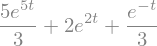

In [16]:
expand(y1.diff(t))

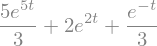

In [17]:
expand(3*y1 + 2*y2 - (2*t**2 + 1)*exp(2*t))

Da beide Ausdrücke gleich sind, überprüfen wir nun ob die beiden Funktionen auch eine Lösung der zweiten DGL sind; ob also das Folgende gilt:

\begin{equation}
\frac{d y_2(t)}{dt} = \, 4 y_1 +  y_2 + \left( t^2 + 2 t - 4 \right) \cdot e^{2t}
\end{equation}

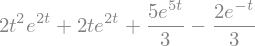

In [18]:
expand(y2.diff(t))

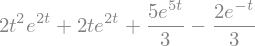

In [19]:
expand(4*y1 + y2 + (t**2 +2*t - 4)*exp(2*t))

Die beiden Funktionen sind somit eine spezielle Lösung des Systems von DGLs.

### Numerische Lösung 

Wir berechnen nun die numerische Lösung des oben beschriebenen Systems bestehend aus zwei gekoppelten DGLs.

Wir benutzen hierfür das Python-Modul <A href="https://docs.scipy.org/doc/scipy/tutorial/index.html#user-guide" target="_blank">SciPy</A>, welches eine breite Kollektion von mathematischen Algorithmen und Funktionen bereitstellt. Im Speziellen werden wir in diesem Semester die Funktion <A href="https://docs.scipy.org/doc/scipy/reference/generated/scipy.integrate.solve_ivp.html#scipy.integrate.solve_ivp" target="_blank">'solve_ivp(...)'</A> verwenden, die sich im Untermodul <A href="https://docs.scipy.org/doc/scipy/reference/integrate.html#module-scipy.integrate" target="_blank">'scipy.integrate'</A> befindet, welches Funktionen zum Lösen von gewöhnlichen Differenzialgleichungen bereitstellt. Zusätzlich berechnen wir die numerische Lösung auch mittels der älteren Methode "integrate.odeint()", die ebenfalls in dem Python-Modul "scipy" definiert ist. 

In [20]:
import numpy as np
import matplotlib.pyplot as plt 
import matplotlib
from scipy import integrate

Wir definieren uns das System der DGLs als eine Funktion

In [21]:
def DGLs(t,y_vec):
    y_1, y_2 = y_vec
    dy_1_dt = 3*y_1 + 2*y_2 - (2*t**2 + 1)*np.exp(2*t)
    dy_2_dt = 4*y_1 + y_2 + (t**2 +2*t - 4)*np.exp(2*t)
    return np.array([dy_1_dt,dy_2_dt])

Zusätzlich auch für die ältere Methode "integrate.odeint()"

In [22]:
def DGLs_odeint(y_vec,t):
    y_1, y_2 = y_vec
    dy_1_dt = 3*y_1 + 2*y_2 - (2*t**2 + 1)*np.exp(2*t)
    dy_2_dt = 4*y_1 + y_2 + (t**2 +2*t - 4)*np.exp(2*t)
    return np.array([dy_1_dt,dy_2_dt])

und lösen das Anfangswertproblem im Bereich $t \in [0,1]$ unter Verwendung von $N=100$ zeitlichen Gitterpunkten (mesh points).

In [23]:
N=100
tval = np.linspace(0, 1, N+1)
y_1_0 = 1
y_2_0 = 1
initialval = np.array([y_1_0,y_2_0])
Loes = integrate.solve_ivp(DGLs, [0, 1], initialval, t_eval=tval)

Zusätzlich auch für die Methode "integrate.odeint()"

In [24]:
Loes_odeint = integrate.odeint(DGLs_odeint, initialval, tval)

Wir stellen uns die numerische Lösung grafisch dar:

In [25]:
params = {
    'figure.figsize'    : [8,5],
#    'text.usetex'       : True,
    'axes.titlesize' : 14,
    'axes.labelsize' : 16,  
    'xtick.labelsize' : 14 ,
    'ytick.labelsize' : 14 
}
matplotlib.rcParams.update(params)

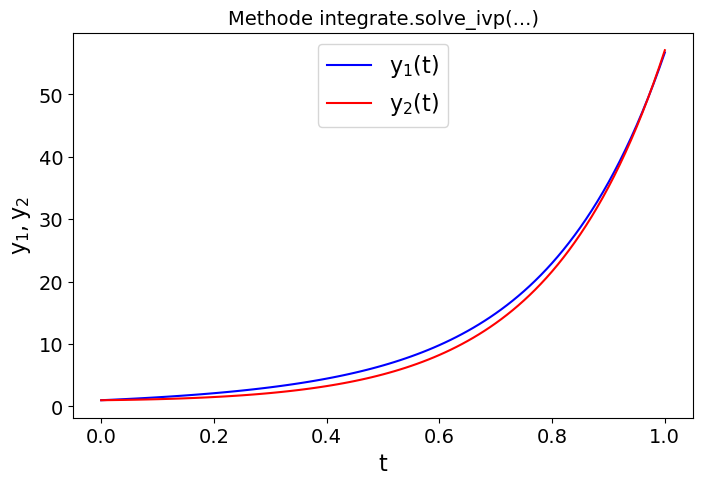

In [26]:
plt.title("Methode integrate.solve_ivp(...)")
plt.xlabel(r"$\rm t$")
plt.ylabel(r"$\rm y_1,y_2$")
plt.plot(Loes.t, Loes.y[0],c="blue", label=r"$\rm y_1(t)$");
plt.plot(Loes.t, Loes.y[1],c="red", label=r"$\rm y_2(t)$");
plt.legend(loc='upper center',fontsize=16);

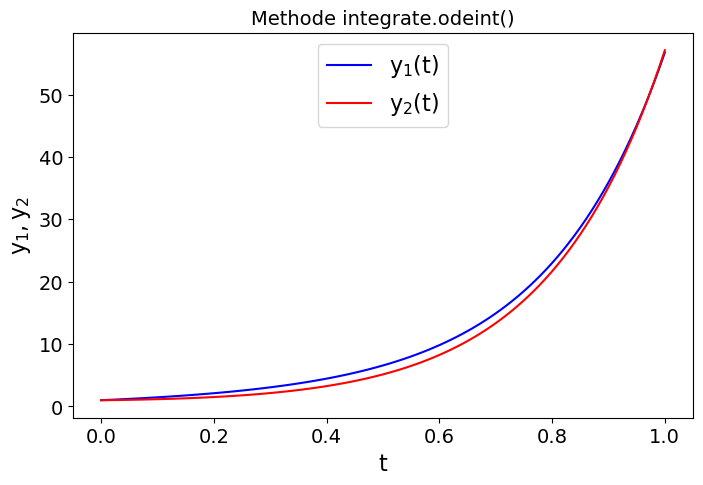

In [27]:
plt.title("Methode integrate.odeint()")
plt.xlabel(r"$\rm t$")
plt.ylabel(r"$\rm y_1,y_2$")
plt.plot(tval, Loes_odeint[:, 0],c="blue", label=r"$\rm y_1(t)$");
plt.plot(tval, Loes_odeint[:, 1],c="red", label=r"$\rm y_2(t)$");
plt.legend(loc='upper center',fontsize=16);

Wir vergleichen diese numerische Lösung mit den Resultaten des C++ Programms <A href="https://itp.uni-frankfurt.de/~hanauske/VPROG/C++/DGL_2.cpp" target="_blank">DGL_2.cpp</A>. Bei der Erzeugung der Daten wurden $N=100$ Gitterpunkten verwendet und die Ergebnisse des C++ Programms wurden in die Datei "DGL_2.dat" geschrieben.

In [28]:
data = np.genfromtxt("./DGL_2.dat")

In [29]:
import matplotlib.gridspec as gridspec
# Bildabmessungen usw.
params = {
    'figure.figsize'    : [14,10],
    'text.usetex'       : True,
    'axes.titlesize' : 14,
    'axes.labelsize' : 16,  
    'xtick.labelsize' : 14 ,
    'ytick.labelsize' : 14 
}
matplotlib.rcParams.update(params) 

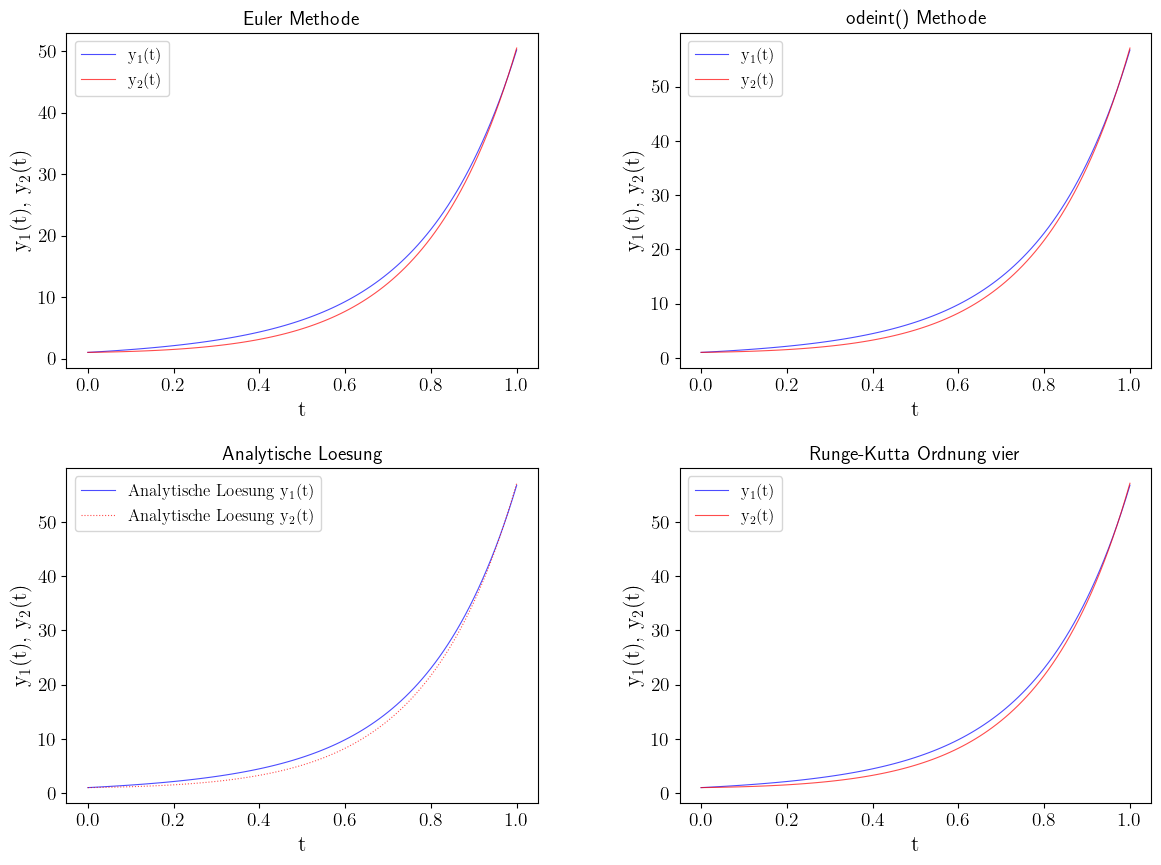

In [30]:
fig = plt.figure()                                                        # Hauptbild
gs = gridspec.GridSpec(2, 2, width_ratios=[1,1], wspace=0.3, hspace=0.3)  # Anordnung der vier Unterbilder
ax1 = plt.subplot(gs[0])
ax2 = plt.subplot(gs[1])
ax3 = plt.subplot(gs[2])
ax4 = plt.subplot(gs[3])

ax1.set_title(r'Euler Methode')                      # Titel der Abbildung in ax1
ax1.set_xlabel(r"$\rm t$")
ax1.set_ylabel(r"$\rm y_1(t), \, y_2(t)$")
ax2.set_title(r'odeint() Methode')                   # Titel der Abbildung in ax2 
ax2.set_xlabel(r"$\rm t$")
ax2.set_ylabel(r"$\rm y_1(t), \, y_2(t)$")
ax3.set_title(r'Analytische Loesung')                # Titel der Abbildung in ax3  
ax3.set_xlabel(r"$\rm t$")
ax3.set_ylabel(r"$\rm y_1(t), \, y_2(t)$")
ax4.set_title(r'Runge-Kutta Ordnung vier')           # Titel der Abbildung in ax4  
ax4.set_xlabel(r"$\rm t$")
ax4.set_ylabel(r"$\rm y_1(t), \, y_2(t)$")

l_width=0.8                                          # Festlegung der Plot-Liniendicke  
alp=0.7                                              # Festlegung der Transparenz der Kurven

ax1.plot(data[:,1],data[:,2], color="blue", linewidth=l_width, linestyle='-', alpha=alp, label=r'$\rm y_1(t)$')
ax1.plot(data[:,1],data[:,3], color="red", linewidth=l_width, linestyle='-', alpha=alp, label=r'$\rm y_2(t)$')

ax2.plot(tval, Loes_odeint[:, 0],c="blue", linewidth=l_width, linestyle='-', alpha=alp, label=r"$\rm y_1(t)$");
ax2.plot(tval, Loes_odeint[:, 1],c="red", linewidth=l_width, linestyle='-', alpha=alp, label=r"$\rm y_2(t)$");

ax3.plot(data[:,1],data[:,6], color="blue", linewidth=l_width, linestyle='-', alpha=alp, label=r'$\rm Analytische \,\, Loesung \,\, y_1(t)$') 
ax3.plot(data[:,1],data[:,7], color="red", linewidth=l_width, linestyle=':', alpha=alp, label=r'$\rm Analytische \,\, Loesung \,\, y_2(t)$') 

ax4.plot(data[:,1],data[:,4], color="blue", linewidth=l_width, linestyle='-', alpha=alp, label=r'$\rm y_1(t)$')
ax4.plot(data[:,1],data[:,5], color="red", linewidth=l_width, linestyle='-', alpha=alp, label=r'$\rm y_2(t)$')

ax1.legend(frameon=True, loc="upper left",fontsize=12)  # Anordnung der Legende auf ax1
ax2.legend(frameon=True, loc="upper left",fontsize=12)  # Anordnung der Legende auf ax2
ax3.legend(frameon=True, loc="upper left",fontsize=12)  # Anordnung der Legende auf ax3
ax4.legend(frameon=True, loc="upper left",fontsize=12); # Anordnung der Legende auf ax4

Wir stellen uns den Fehler $\Delta y$ der simulierten Datenpunkte zur analytischen Lösung dar ($\Delta y_i = y_i^{analytisch}-y_i$, $i=1,2$):

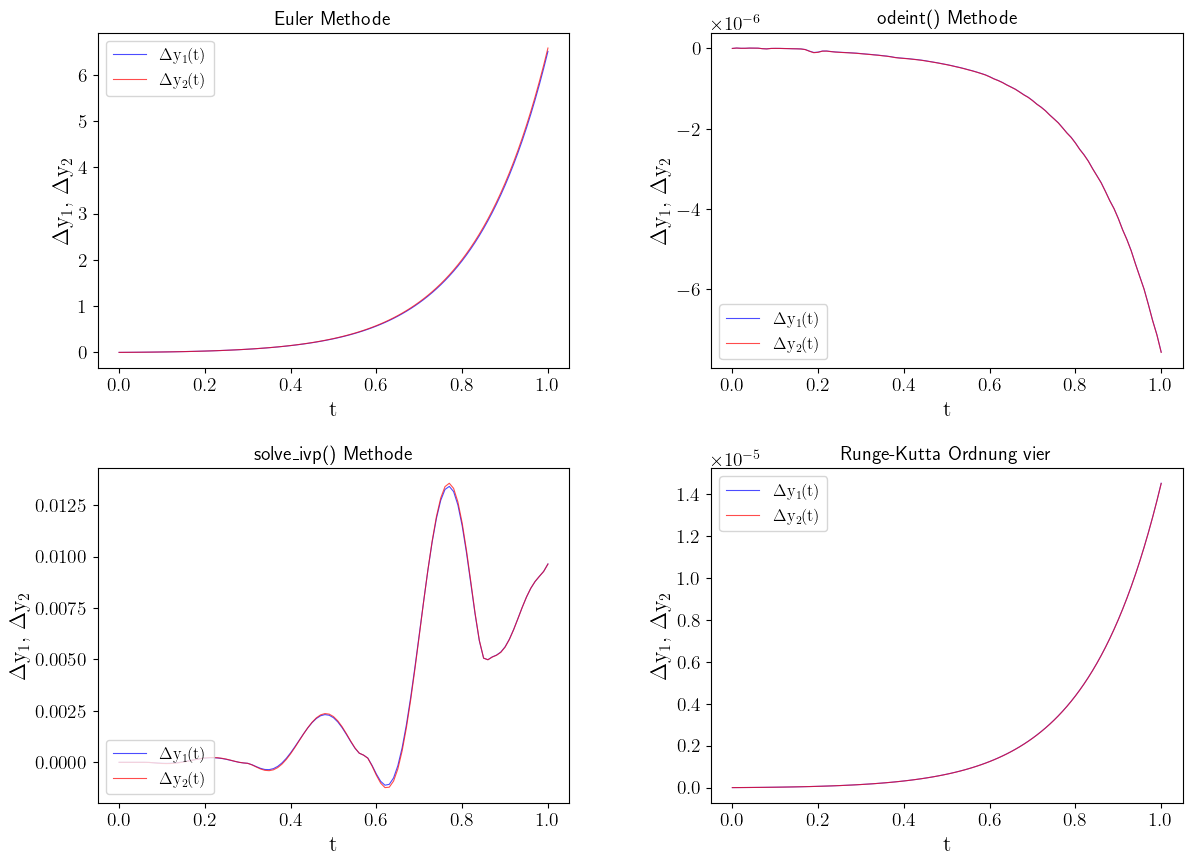

In [31]:
fig = plt.figure()                                                        # Hauptbild
gs = gridspec.GridSpec(2, 2, width_ratios=[1,1], wspace=0.3, hspace=0.3)  # Anordnung der vier Unterbilder
ax1 = plt.subplot(gs[0])
ax2 = plt.subplot(gs[1])
ax3 = plt.subplot(gs[2])
ax4 = plt.subplot(gs[3])

ax1.set_title(r'Euler Methode')                      # Titel der Abbildung in ax1
ax1.set_xlabel(r"$\rm t$")
ax1.set_ylabel(r"$\rm \Delta y_1, \, \Delta y_2$")
ax2.set_title(r'odeint() Methode')                   # Titel der Abbildung in ax2 
ax2.set_xlabel(r"$\rm t$")
ax2.set_ylabel(r"$\rm \Delta y_1, \, \Delta y_2$")
ax3.set_title(r'solve_ivp() Methode')                # Titel der Abbildung in ax3  
ax3.set_xlabel(r"$\rm t$")
ax3.set_ylabel(r"$\rm \Delta y_1, \, \Delta y_2$")
ax4.set_title(r'Runge-Kutta Ordnung vier')           # Titel der Abbildung in ax4  
ax4.set_xlabel(r"$\rm t$")
ax4.set_ylabel(r"$\rm \Delta y_1, \, \Delta y_2$")

l_width=0.8                                          # Festlegung der Plot-Liniendicke  
alp=0.7                                              # Festlegung der Transparenz der Kurven


ax1.plot(data[:,1],data[:,6]-data[:,2], color="blue", linewidth=l_width, linestyle='-', alpha=alp, label=r'$\rm \Delta y_1(t)$')
ax1.plot(data[:,1],data[:,7]-data[:,3], color="red", linewidth=l_width, linestyle='-', alpha=alp, label=r'$\rm \Delta y_2(t)$')

ax2.plot(data[:,1],data[:,6]-Loes_odeint[:, 0], color="blue", linewidth=l_width, linestyle='-', alpha=alp, label=r'$\rm \Delta y_1(t)$')
ax2.plot(data[:,1],data[:,7]-Loes_odeint[:, 1], color="red", linewidth=l_width, linestyle='-', alpha=alp, label=r'$\rm \Delta y_2(t)$')

ax3.plot(data[:,1],data[:,6]-Loes.y[0], color="blue", linewidth=l_width, linestyle='-', alpha=alp, label=r'$\rm \Delta y_1(t)$')
ax3.plot(data[:,1],data[:,7]-Loes.y[1], color="red", linewidth=l_width, linestyle='-', alpha=alp, label=r'$\rm \Delta y_2(t)$')

ax4.plot(data[:,1],data[:,6]-data[:,4], color="blue", linewidth=l_width, linestyle='-', alpha=alp, label=r'$\rm \Delta y_1(t)$')
ax4.plot(data[:,1],data[:,7]-data[:,5], color="red", linewidth=l_width, linestyle='-', alpha=alp, label=r'$\rm \Delta y_2(t)$')

ax1.legend(frameon=True, loc="upper left",fontsize=12)  # Anordnung der Legende auf ax1
ax2.legend(frameon=True, loc="lower left",fontsize=12)  # Anordnung der Legende auf ax2
ax3.legend(frameon=True, loc="lower left",fontsize=12)  # Anordnung der Legende auf ax3
ax4.legend(frameon=True, loc="upper left",fontsize=12); # Anordnung der Legende auf ax4

Bei dem numerischen Lösen in Python (mittels solve_ivp(...) bzw. odeint(...)) kann der Benutzer die relativen und absoluten Fehler-Toleranzen der berechneten nummerischen Werte ebenfalls festlegen, wober der relative Fehler mit der Zusatzoption 'rtol' und der absolute Fehler mit der Zusatzoption 'atol' kontrolliert wird (näheres siehe <A href="https://docs.scipy.org/doc/scipy/reference/generated/scipy.integrate.solve_ivp.html" target="_blank">scipy.integrate.solve_ivp</A>). Im Folgenden setzen wir die relativen und absoluten Fehler-Toleranzen (rtol und atol) auf $10^{-13}$ und stellen uns den Fehler $\Delta y_1$ und $\Delta y_2$ der Simulationen wieder grafisch dar.

Wir erhöhen nun auch die Anzahl der Gitterpunkte ($N=10000$) im C++ Programm und betrachten uns wieder den Fehler $\Delta y_1$ und $\Delta y_2$. 

In [32]:
data = np.genfromtxt("./DGL_2a.dat")

In [33]:
fehler = 10**(-13)
N=10000
tval = np.linspace(0, 1, N+1)
Loes = integrate.solve_ivp(DGLs, [0, 1], initialval, t_eval=tval, rtol=fehler, atol=fehler)
Loes_odeint = integrate.odeint(DGLs_odeint, initialval, tval, rtol=fehler, atol=fehler)

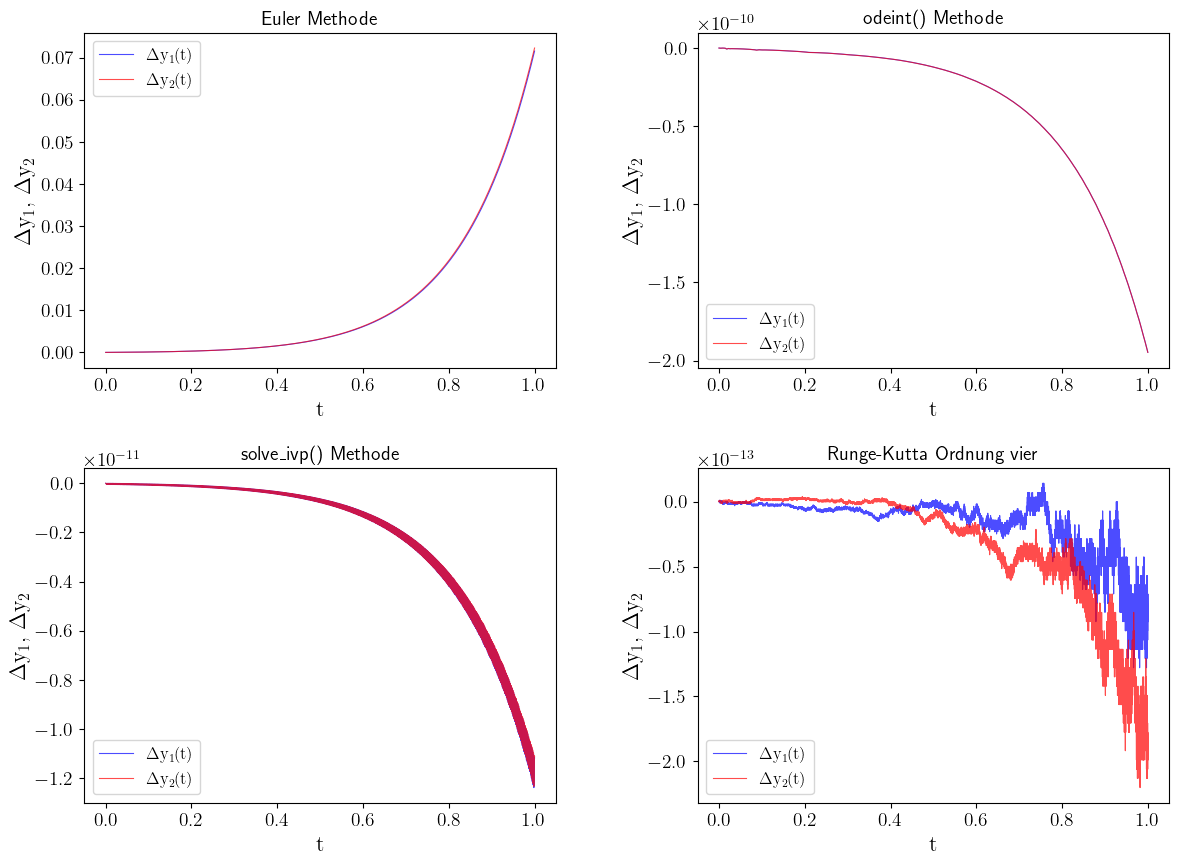

In [34]:
fig = plt.figure()                                                        # Hauptbild
gs = gridspec.GridSpec(2, 2, width_ratios=[1,1], wspace=0.3, hspace=0.3)  # Anordnung der vier Unterbilder
ax1 = plt.subplot(gs[0])
ax2 = plt.subplot(gs[1])
ax3 = plt.subplot(gs[2])
ax4 = plt.subplot(gs[3])

ax1.set_title(r'Euler Methode')                      # Titel der Abbildung in ax1
ax1.set_xlabel(r"$\rm t$")
ax1.set_ylabel(r"$\rm \Delta y_1, \, \Delta y_2$")
ax2.set_title(r'odeint() Methode')                   # Titel der Abbildung in ax2 
ax2.set_xlabel(r"$\rm t$")
ax2.set_ylabel(r"$\rm \Delta y_1, \, \Delta y_2$")
ax3.set_title(r'solve_ivp() Methode')                # Titel der Abbildung in ax3  
ax3.set_xlabel(r"$\rm t$")
ax3.set_ylabel(r"$\rm \Delta y_1, \, \Delta y_2$")
ax4.set_title(r'Runge-Kutta Ordnung vier')           # Titel der Abbildung in ax4  
ax4.set_xlabel(r"$\rm t$")
ax4.set_ylabel(r"$\rm \Delta y_1, \, \Delta y_2$")

l_width=0.8                                          # Festlegung der Plot-Liniendicke  
alp=0.7                                              # Festlegung der Transparenz der Kurven


ax1.plot(data[:,1],data[:,6]-data[:,2], color="blue", linewidth=l_width, linestyle='-', alpha=alp, label=r'$\rm \Delta y_1(t)$')
ax1.plot(data[:,1],data[:,7]-data[:,3], color="red", linewidth=l_width, linestyle='-', alpha=alp, label=r'$\rm \Delta y_2(t)$')

ax2.plot(data[:,1],data[:,6]-Loes_odeint[:, 0], color="blue", linewidth=l_width, linestyle='-', alpha=alp, label=r'$\rm \Delta y_1(t)$')
ax2.plot(data[:,1],data[:,7]-Loes_odeint[:, 1], color="red", linewidth=l_width, linestyle='-', alpha=alp, label=r'$\rm \Delta y_2(t)$')

ax3.plot(data[:,1],data[:,6]-Loes.y[0], color="blue", linewidth=l_width, linestyle='-', alpha=alp, label=r'$\rm \Delta y_1(t)$')
ax3.plot(data[:,1],data[:,7]-Loes.y[1], color="red", linewidth=l_width, linestyle='-', alpha=alp, label=r'$\rm \Delta y_2(t)$')

ax4.plot(data[:,1],data[:,6]-data[:,4], color="blue", linewidth=l_width, linestyle='-', alpha=alp, label=r'$\rm \Delta y_1(t)$')
ax4.plot(data[:,1],data[:,7]-data[:,5], color="red", linewidth=l_width, linestyle='-', alpha=alp, label=r'$\rm \Delta y_2(t)$')

ax1.legend(frameon=True, loc="upper left",fontsize=12)  # Anordnung der Legende auf ax1
ax2.legend(frameon=True, loc="lower left",fontsize=12)  # Anordnung der Legende auf ax2
ax3.legend(frameon=True, loc="lower left",fontsize=12)  # Anordnung der Legende auf ax3
ax4.legend(frameon=True, loc="lower left",fontsize=12); # Anordnung der Legende auf ax4

###  Differentialgleichungen höherer Ordnung

Wir betrachten nun das numerische Lösen einer Differentialgleichung höherer Ordnung (zunächst allgemein der Ordnung $m$) mit folgender Form 

$$
\begin{equation}
y^{(m)}(t) = \frac{d^m y(t)}{dt^m} = f(t,y,\dot{y},\ddot{y},...,y^{(m-1)})\,\, , \quad a \leq t \leq b \quad ,
\end{equation}
$$

bei gegebener Anfangskonfiguration

$$
\begin{equation}
y(a) = \alpha_1 \, , \,\, \dot{y}(a) = \alpha_2 \, , \,\, ... \,\, ,\,  y^{(m-1)}(a) = \alpha_m \quad .
\end{equation}
$$

Man kann nun diese DGL von Ordnung $m$ in ein System von $m$ Differentialgleichungen umschreiben und dieses dann numerisch lösen. Wir machen zunächst die folgende Variablenumbenennung ($u_1(t)=y(t)$, $u_2(t)=\dot{y}(t)$, $u_3(t)=\ddot{y}(t)$, ...  $u_m(t)=y^{(m-1)}(t)$) und definieren das System von DGLs wie folgt:

$$
\begin{eqnarray}
\dot{u_1}(t) &=& \frac{d u_1}{dt} = \frac{d y}{dt} = u_2(t) \\
\dot{u_2}(t) &=& \frac{d u_2}{dt} = \frac{d \dot{y}}{dt} = \ddot{y}(t) = u_3(t) \\
\dot{u_3}(t) &=& \frac{d u_3}{dt} = \frac{d \ddot{y}}{dt} = ... \,\,\\
... &=& ... &\\
\dot{u}_{m-1}(t) &=& \frac{d y^{(m-2)}}{dt} = y^{(m-1)}(t) = u_m(t)  \\
\dot{u}_{m}(t) &=& \frac{d y_{(m-1)}}{dt} =  y^{(m)}(t) = f(t,y,\dot{y},\ddot{y},...,y^{(m-1)}) = f(t,u_1,u_2,u_3,...,u_m) \quad ,
\end{eqnarray}
$$

wobei die zeitliche Entwicklung der Vektorfunktion $\vec{u}(t) = \left( u_1(t), u_2(t), ..., u_m(t) \right)$ in den Grenzen $a \leq t \leq b$ gesucht wird. Es wird hierbei wieder vorausgesetzt, dass die Funktion $f(t,y,\dot{y},\ddot{y},...,y^{(m-1)})$ auf einer Teilmenge ${\cal D}$ ( $\mathbb{R}^{m+1} \supseteq {\cal D}$ ) kontinuierlich definiert ist und das so definierte Anfangswertproblem "well-posed" ist und eine eindeutige Lösung $\vec{u}(t)$ existiert. 

Bei gegebener Anfangskonfiguration

$$
\begin{equation}
u_1(a) = y(a) = \alpha_1 \, , \,\, u_2(a) = \dot{y}(a) = \alpha_2 \, , \,\, ... \,\, ,\,  u_m(a) = y^{(m-1)}(a)= \alpha_m 
\end{equation}
$$

ist es dann numerisch möglich, das System von gekoppelten DGLs zu lösen und somit das zeitliche Verhalten der Funktion $y(t) = u_1(t)$ zu simulieren.

### Beispiel: Differentialgleichung zweiter Ordnung ($m=2$)
Wir betrachten speziell die folgende Differentialgleichung zweiter Ordnung ($m=2$):

$$
\begin{equation}
\ddot{y} - 2\dot{y} + 2y = e^{2t} \hbox{sin}(t) \,\, \quad  \hbox{bzw.} \quad  \ddot{y}  = 2\dot{y} - 2y + e^{2t} \hbox{sin}(t) =: f(t,y,\dot{y}) 
\end{equation}
$$

Wir machen die vorgegebene Variablenumbenennung ($u_1(t)=y(t)$, $u_2(t)=\dot{y}(t)$) und definieren das System von DGLs wie folgt:

$$
\begin{eqnarray}
\dot{u_1}(t) &=& \frac{d u_1}{dt} = \frac{d y}{dt} = u_2(t) \\
\dot{u_2}(t) &=& \frac{d u_2}{dt} = \frac{d \dot{y}}{dt} = \ddot{y}(t) = 2 u_2(t) - 2 u_1(t) + e^{2t} \hbox{sin}(t) =: f(t,u_1,u_2)
\end{eqnarray}
$$

Wir berechnen nun die numerische Lösung $\vec{u}(t) = \left( u_1(t), u_2(t) \right)$ im Zeitintervall $t \in [0,1]$ bei vorgegebener Anfangsbedingung

$$
\begin{equation}
u_1(0) = y(0) = \alpha_1 = -0.4 \,\, , \quad u_2(0) = \dot{y}(0) = \alpha_2 = -0.6  \quad .
\end{equation}
$$

Obwohl wir in diesem Notebook die Differentialgleichung zweiter Ordnung numerisch lösen werden, zeigen wir im Folgenden kurz, wie man mittels 'sympy' die analytische Lösung findet.

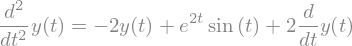

In [35]:
t= symbols('t',real=True)
y = Function('y')(t)
DGL = Eq(y.diff(t).diff(t), 2*y.diff(t) - 2*y + exp(2*t)*sin(t))
DGL

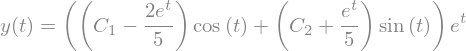

In [36]:
dsolve(DGL)

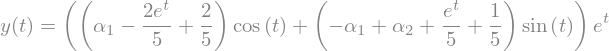

In [37]:
alpha_1, alpha_2= symbols('alpha_1, alpha_2', real = True)
Loes_ana=dsolve(DGL,ics={y.subs(t,0):alpha_1,y.diff(t).subs(t, 0): alpha_2})
Loes_ana

Die obere Funktion $y(t)=u_1(t)$ stellt die Lösung der DGL bei vorgegebener Anfangsbedingung $u_1(0) = y(0) = \alpha_1 \,\, , \quad u_2(0) = \dot{y}(0) = \alpha_2$ dar.

Den Ausdruck für $\dot{y}(t)=u_2(t)$ erhält man durch differenzieren:

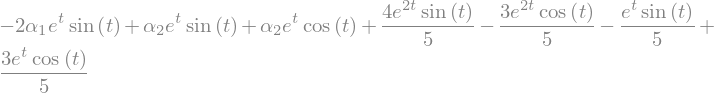

In [38]:
Loes_ana_diff = expand(Loes_ana.rhs.diff(t))
Loes_ana_diff

Diese allgemeine Lösungen können wir später zum Vergleich in unserem C++ Programm verwenden. Wir schreiben sie somit als C++-Ausdrücke:

In [39]:
from sympy.codegen.ast import Assignment
wert= symbols('wert')
print(ccode(Assignment(wert, Loes_ana.rhs)))

wert = ((alpha_1 - 2.0/5.0*exp(t) + 2.0/5.0)*cos(t) + (-alpha_1 + alpha_2 + (1.0/5.0)*exp(t) + 1.0/5.0)*sin(t))*exp(t);


In [40]:
print(ccode(Assignment(wert, Loes_ana_diff)))

wert = -2*alpha_1*exp(t)*sin(t) + alpha_2*exp(t)*sin(t) + alpha_2*exp(t)*cos(t) + (4.0/5.0)*exp(2*t)*sin(t) - 3.0/5.0*exp(2*t)*cos(t) - 1.0/5.0*exp(t)*sin(t) + (3.0/5.0)*exp(t)*cos(t);


### Numerische Lösung 

Wir definieren uns das System der DGLs als eine Funktion

In [41]:
def DGLs(t,u_vec):
    u_1, u_2 = u_vec
    du_1_dt = u_2
    du_2_dt = 2*u_2 - 2*u_1 + np.exp(2*t)*np.sin(t)
    return np.array([du_1_dt,du_2_dt])

Zusätzlich auch für die ältere Methode "integrate.odeint()"

In [42]:
def DGLs_odeint(u_vec,t):
    u_1, u_2 = u_vec
    du_1_dt = u_2
    du_2_dt = 2*u_2 - 2*u_1 + np.exp(2*t)*np.sin(t)
    return np.array([du_1_dt,du_2_dt])

und lösen das Anfangswertproblem im Bereich $t \in [0,1]$ unter Verwendung von $N=100$ zeitlichen Gitterpunkten (mesh points).

In [43]:
N=100
tval = np.linspace(0, 1, N+1)
u_1_0 = -0.4
u_2_0 = -0.6
initialval = np.array([u_1_0,u_2_0])
Loes = integrate.solve_ivp(DGLs, [0, 1], initialval, t_eval=tval)

Zusätzlich auch für die Methode "integrate.odeint()"

In [44]:
Loes_odeint = integrate.odeint(DGLs_odeint, initialval, tval)

Wir stellen uns die numerische Lösung grafisch dar:

In [45]:
params = {
    'figure.figsize'    : [8,5],
#    'text.usetex'       : True,
    'axes.titlesize' : 14,
    'axes.labelsize' : 16,  
    'xtick.labelsize' : 14 ,
    'ytick.labelsize' : 14 
}
matplotlib.rcParams.update(params) 

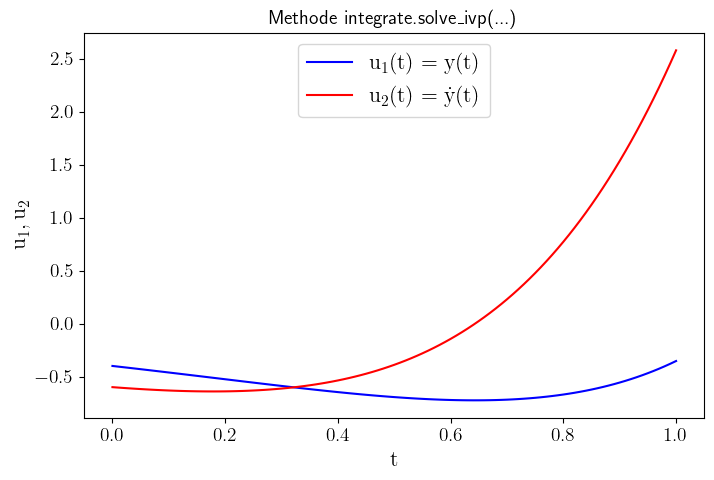

In [46]:
plt.title("Methode integrate.solve_ivp(...)")
plt.xlabel(r"$\rm t$")
plt.ylabel(r"$\rm u_1,u_2$")
plt.plot(Loes.t, Loes.y[0],c="blue", label=r"$\rm u_1(t)=y(t)$");
plt.plot(Loes.t, Loes.y[1],c="red", label=r"$\rm u_2(t)=\dot{y}(t)$");
plt.legend(loc='upper center',fontsize=16);

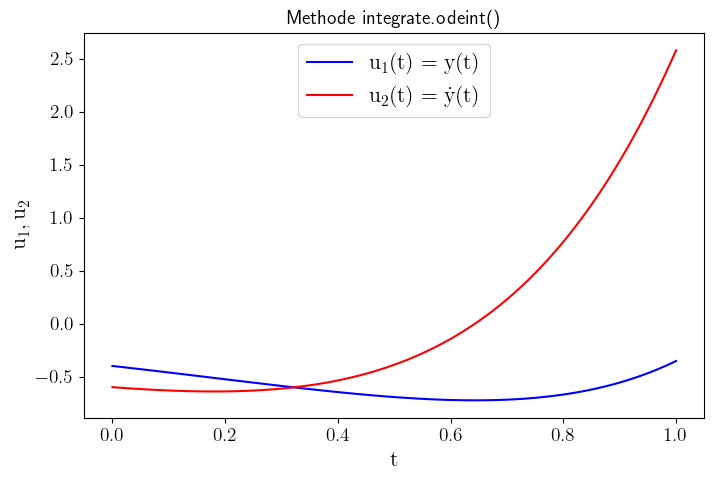

In [47]:
plt.title("Methode integrate.odeint()")
plt.xlabel(r"$\rm t$")
plt.ylabel(r"$\rm u_1,u_2$")
plt.plot(tval, Loes_odeint[:, 0],c="blue", label=r"$\rm u_1(t)=y(t)$");
plt.plot(tval, Loes_odeint[:, 1],c="red", label=r"$\rm u_2(t)=\dot{y}(t)$");
plt.legend(loc='upper center',fontsize=16);

Wir vergleichen diese numerische Lösung mit den Resultaten des C++ Programms <A href="https://itp.uni-frankfurt.de/~hanauske/VPROG/C++/DGL_2_a.cpp" target="_blank">DGL_2_a.cpp</A>. Bei der Erzeugung der Daten wurden $N=100$ Gitterpunkten verwendet und die Ergebnisse des C++ Programms wurden in die Datei "DGL_2_a.dat" geschrieben.

In [48]:
data = np.genfromtxt("./DGL_2_a.dat")

In [49]:
import matplotlib.gridspec as gridspec
# Bildabmessungen usw.
params = {
    'figure.figsize'    : [14,10],
    'text.usetex'       : True,
    'axes.titlesize' : 14,
    'axes.labelsize' : 16,  
    'xtick.labelsize' : 14 ,
    'ytick.labelsize' : 14 
}
matplotlib.rcParams.update(params) 

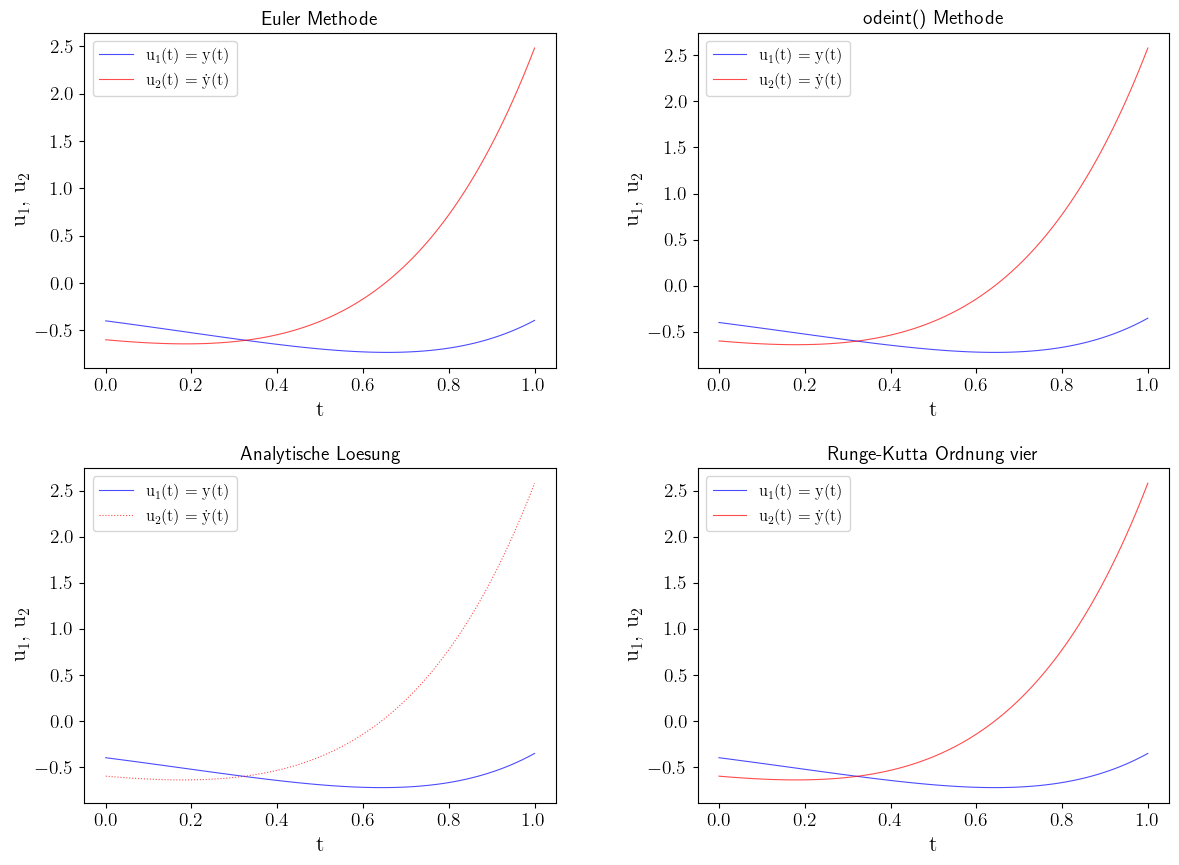

In [50]:
fig = plt.figure()                                                        # Hauptbild
gs = gridspec.GridSpec(2, 2, width_ratios=[1,1], wspace=0.3, hspace=0.3)  # Anordnung der vier Unterbilder
ax1 = plt.subplot(gs[0])
ax2 = plt.subplot(gs[1])
ax3 = plt.subplot(gs[2])
ax4 = plt.subplot(gs[3])

ax1.set_title(r'Euler Methode')                      # Titel der Abbildung in ax1
ax1.set_xlabel(r"$\rm t$")
ax1.set_ylabel(r"$\rm u_1, \, u_2$")
ax2.set_title(r'odeint() Methode')                   # Titel der Abbildung in ax2 
ax2.set_xlabel(r"$\rm t$")
ax2.set_ylabel(r"$\rm  u_1, \, u_2$")
ax3.set_title(r'Analytische Loesung')                # Titel der Abbildung in ax3  
ax3.set_xlabel(r"$\rm t$")
ax3.set_ylabel(r"$\rm  u_1, \, u_2$")
ax4.set_title(r'Runge-Kutta Ordnung vier')           # Titel der Abbildung in ax4  
ax4.set_xlabel(r"$\rm t$")
ax4.set_ylabel(r"$\rm  u_1, \, u_2$")

l_width=0.8                                          # Festlegung der Plot-Liniendicke  
alp=0.7                                              # Festlegung der Transparenz der Kurven

ax1.plot(data[:,1],data[:,2], color="blue", linewidth=l_width, linestyle='-', alpha=alp, label=r'$\rm u_1(t)=y(t)$')
ax1.plot(data[:,1],data[:,3], color="red", linewidth=l_width, linestyle='-', alpha=alp, label=r'$\rm u_2(t)=\dot{y}(t)$')

ax2.plot(tval, Loes_odeint[:, 0],c="blue", linewidth=l_width, linestyle='-', alpha=alp, label=r"$\rm u_1(t)=y(t)$");
ax2.plot(tval, Loes_odeint[:, 1],c="red", linewidth=l_width, linestyle='-', alpha=alp, label=r"$\rm u_2(t)=\dot{y}(t)$");

ax3.plot(data[:,1],data[:,6], color="blue", linewidth=l_width, linestyle='-', alpha=alp, label=r'$\rm u_1(t)=y(t)$') 
ax3.plot(data[:,1],data[:,7], color="red", linewidth=l_width, linestyle=':', alpha=alp, label=r'$\rm u_2(t)=\dot{y}(t)$') 

ax4.plot(data[:,1],data[:,4], color="blue", linewidth=l_width, linestyle='-', alpha=alp, label=r'$\rm u_1(t)=y(t)$')
ax4.plot(data[:,1],data[:,5], color="red", linewidth=l_width, linestyle='-', alpha=alp, label=r'$\rm u_2(t)=\dot{y}(t)$')

ax1.legend(frameon=True, loc="upper left",fontsize=12)  # Anordnung der Legende auf ax1
ax2.legend(frameon=True, loc="upper left",fontsize=12)  # Anordnung der Legende auf ax2
ax3.legend(frameon=True, loc="upper left",fontsize=12)  # Anordnung der Legende auf ax3
ax4.legend(frameon=True, loc="upper left",fontsize=12); # Anordnung der Legende auf ax4

Wir stellen uns den Fehler $\Delta y$ der simulierten Datenpunkte zur analytischen Lösung dar ($\Delta u_i = u_i^{analytisch}-u_i$, $i=1,2$):

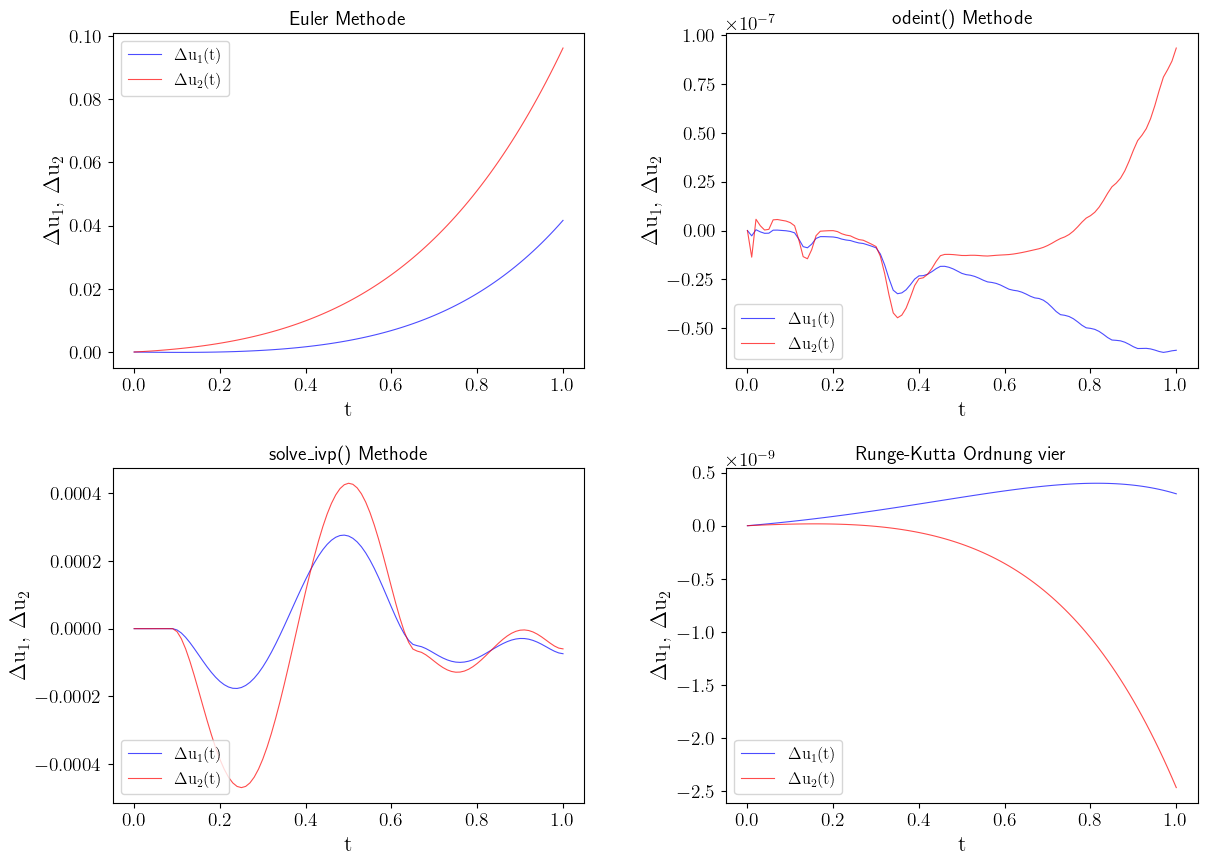

In [51]:
fig = plt.figure()                                                        # Hauptbild
gs = gridspec.GridSpec(2, 2, width_ratios=[1,1], wspace=0.3, hspace=0.3)  # Anordnung der vier Unterbilder
ax1 = plt.subplot(gs[0])
ax2 = plt.subplot(gs[1])
ax3 = plt.subplot(gs[2])
ax4 = plt.subplot(gs[3])

ax1.set_title(r'Euler Methode')                      # Titel der Abbildung in ax1
ax1.set_xlabel(r"$\rm t$")
ax1.set_ylabel(r"$\rm \Delta u_1, \, \Delta u_2$")
ax2.set_title(r'odeint() Methode')                   # Titel der Abbildung in ax2 
ax2.set_xlabel(r"$\rm t$")
ax2.set_ylabel(r"$\rm \Delta u_1, \, \Delta u_2$")
ax3.set_title(r'solve_ivp() Methode')                # Titel der Abbildung in ax3  
ax3.set_xlabel(r"$\rm t$")
ax3.set_ylabel(r"$\rm \Delta u_1, \, \Delta u_2$")
ax4.set_title(r'Runge-Kutta Ordnung vier')           # Titel der Abbildung in ax4  
ax4.set_xlabel(r"$\rm t$")
ax4.set_ylabel(r"$\rm \Delta u_1, \, \Delta u_2$")

l_width=0.8                                          # Festlegung der Plot-Liniendicke  
alp=0.7                                              # Festlegung der Transparenz der Kurven


ax1.plot(data[:,1],data[:,6]-data[:,2], color="blue", linewidth=l_width, linestyle='-', alpha=alp, label=r'$\rm \Delta u_1(t)$')
ax1.plot(data[:,1],data[:,7]-data[:,3], color="red", linewidth=l_width, linestyle='-', alpha=alp, label=r'$\rm \Delta u_2(t)$')

ax2.plot(data[:,1],data[:,6]-Loes_odeint[:, 0], color="blue", linewidth=l_width, linestyle='-', alpha=alp, label=r'$\rm \Delta u_1(t)$')
ax2.plot(data[:,1],data[:,7]-Loes_odeint[:, 1], color="red", linewidth=l_width, linestyle='-', alpha=alp, label=r'$\rm \Delta u_2(t)$')

ax3.plot(data[:,1],data[:,6]-Loes.y[0], color="blue", linewidth=l_width, linestyle='-', alpha=alp, label=r'$\rm \Delta u_1(t)$')
ax3.plot(data[:,1],data[:,7]-Loes.y[1], color="red", linewidth=l_width, linestyle='-', alpha=alp, label=r'$\rm \Delta u_2(t)$')

ax4.plot(data[:,1],data[:,6]-data[:,4], color="blue", linewidth=l_width, linestyle='-', alpha=alp, label=r'$\rm \Delta u_1(t)$')
ax4.plot(data[:,1],data[:,7]-data[:,5], color="red", linewidth=l_width, linestyle='-', alpha=alp, label=r'$\rm \Delta u_2(t)$')

ax1.legend(frameon=True, loc="upper left",fontsize=12)  # Anordnung der Legende auf ax1
ax2.legend(frameon=True, loc="lower left",fontsize=12)  # Anordnung der Legende auf ax2
ax3.legend(frameon=True, loc="lower left",fontsize=12)  # Anordnung der Legende auf ax3
ax4.legend(frameon=True, loc="lower left",fontsize=12); # Anordnung der Legende auf ax4

Im Folgenden setzen wir die relativen und absoluten Fehler-Toleranzen (rtol und atol) wieder auf $10^{-13}$ und stellen uns die Fehler $\Delta y(t)$ und $\Delta \dot{y}(t)$ der Python Simulationen grafisch dar. Wir erhöhen auch die Anzahl der Gitterpunkte im C++ Programm ($N=10000$) und betrachten uns wieder die Fehler $\Delta y(t)$ und $\Delta \dot{y}(t)$.

In [52]:
data = np.genfromtxt("./DGL_2_a1.dat")

In [53]:
fehler = 10**(-13)
N=10000
tval = np.linspace(0, 1, N+1)
Loes = integrate.solve_ivp(DGLs, [0, 1], initialval, t_eval=tval, rtol=fehler, atol=fehler)
Loes_odeint = integrate.odeint(DGLs_odeint, initialval, tval, rtol=fehler, atol=fehler)

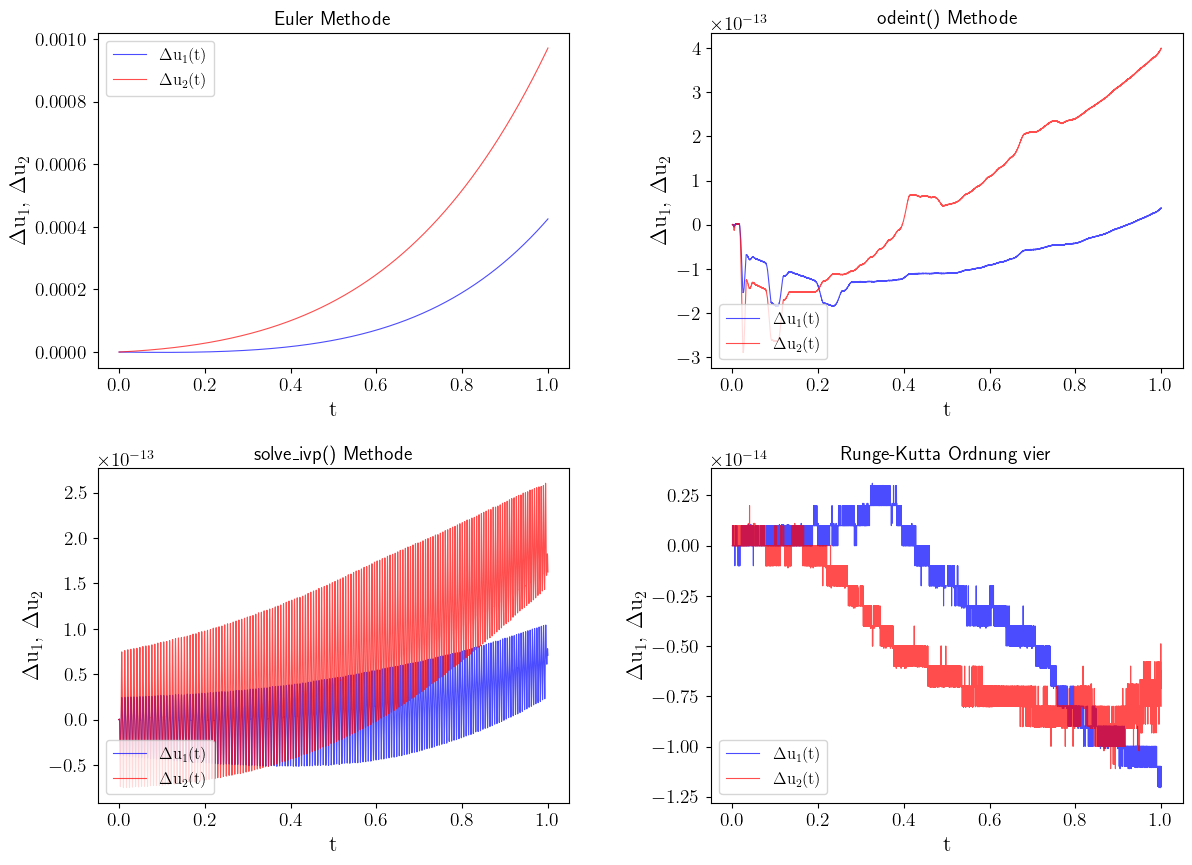

In [54]:
fig = plt.figure()                                                        # Hauptbild
gs = gridspec.GridSpec(2, 2, width_ratios=[1,1], wspace=0.3, hspace=0.3)  # Anordnung der vier Unterbilder
ax1 = plt.subplot(gs[0])
ax2 = plt.subplot(gs[1])
ax3 = plt.subplot(gs[2])
ax4 = plt.subplot(gs[3])

ax1.set_title(r'Euler Methode')                      # Titel der Abbildung in ax1
ax1.set_xlabel(r"$\rm t$")
ax1.set_ylabel(r"$\rm \Delta u_1, \, \Delta u_2$")
ax2.set_title(r'odeint() Methode')                   # Titel der Abbildung in ax2 
ax2.set_xlabel(r"$\rm t$")
ax2.set_ylabel(r"$\rm \Delta u_1, \, \Delta u_2$")
ax3.set_title(r'solve_ivp() Methode')                # Titel der Abbildung in ax3  
ax3.set_xlabel(r"$\rm t$")
ax3.set_ylabel(r"$\rm \Delta u_1, \, \Delta u_2$")
ax4.set_title(r'Runge-Kutta Ordnung vier')           # Titel der Abbildung in ax4  
ax4.set_xlabel(r"$\rm t$")
ax4.set_ylabel(r"$\rm \Delta u_1, \, \Delta u_2$")

l_width=0.8                                          # Festlegung der Plot-Liniendicke  
alp=0.7                                              # Festlegung der Transparenz der Kurven


ax1.plot(data[:,1],data[:,6]-data[:,2], color="blue", linewidth=l_width, linestyle='-', alpha=alp, label=r'$\rm \Delta u_1(t)$')
ax1.plot(data[:,1],data[:,7]-data[:,3], color="red", linewidth=l_width, linestyle='-', alpha=alp, label=r'$\rm \Delta u_2(t)$')

ax2.plot(data[:,1],data[:,6]-Loes_odeint[:, 0], color="blue", linewidth=l_width, linestyle='-', alpha=alp, label=r'$\rm \Delta u_1(t)$')
ax2.plot(data[:,1],data[:,7]-Loes_odeint[:, 1], color="red", linewidth=l_width, linestyle='-', alpha=alp, label=r'$\rm \Delta u_2(t)$')

ax3.plot(data[:,1],data[:,6]-Loes.y[0], color="blue", linewidth=l_width, linestyle='-', alpha=alp, label=r'$\rm \Delta u_1(t)$')
ax3.plot(data[:,1],data[:,7]-Loes.y[1], color="red", linewidth=l_width, linestyle='-', alpha=alp, label=r'$\rm \Delta u_2(t)$')

ax4.plot(data[:,1],data[:,6]-data[:,4], color="blue", linewidth=l_width, linestyle='-', alpha=alp, label=r'$\rm \Delta u_1(t)$')
ax4.plot(data[:,1],data[:,7]-data[:,5], color="red", linewidth=l_width, linestyle='-', alpha=alp, label=r'$\rm \Delta u_2(t)$')

ax1.legend(frameon=True, loc="upper left",fontsize=12)  # Anordnung der Legende auf ax1
ax2.legend(frameon=True, loc="lower left",fontsize=12)  # Anordnung der Legende auf ax2
ax3.legend(frameon=True, loc="lower left",fontsize=12)  # Anordnung der Legende auf ax3
ax4.legend(frameon=True, loc="lower left",fontsize=12); # Anordnung der Legende auf ax4